<a href="https://colab.research.google.com/github/MelloFernanda/precificacao-carro/blob/main/Classifica%C3%A7%C3%A3o_Precifica%C3%A7%C3%A3o_de_carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação com SKLearn - SVM e Árvore de decisão

Partindo de uma base fictícia de preços de carros, faremos a limpeza e predição dos dados.

O objetivo deste código é:

*   Treinar o código para prever se o carro será ou não vendido de acordo com os dados disponíveis sobre o veículo;
*   Utilizar os modelos de estudo SVM e Árvore de Decisão para enconrar o que apresenta a melhor acurácia na previsão de preços dos carros.

In [116]:
!pip install graphviz==0.10
!apt-get install graphviz

  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [117]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz

In [118]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

df = pd.read_csv(uri)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


##Tratando dados

- Padronizando dados

In [119]:
#Renomeando colunas para português

rename_collumns= {
    'model_year': 'ano_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

df = df.rename(columns=rename_collumns)

In [120]:
df.head()

,Unnamed: 0,mileage_per_year,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [121]:
#Substituindo medidas - milhas por km

df['km_por_ano'] = df['mileage_per_year']*1.60934

In [122]:
#Dropando colunas que não serão usadas

df = df.drop(['Unnamed: 0', 'mileage_per_year'], axis=1)

In [123]:
#Substituindo valores

df['vendido'].unique()

df['vendido'] = df['vendido'].replace({'yes': 1, 'no': 0})

In [124]:
df.head()

,ano_modelo,preco,vendido,km_por_ano
0,2000,30941.02,1,35085.22134
1,1998,40557.96,1,12622.05362
2,2006,89627.50,0,11440.79806
3,2015,95276.14,0,43167.32682
4,2014,117384.68,1,12770.11290


- Analisando nulos e duplicatas

In [125]:
df.dtypes

ano_modelo      int64
preco         float64
vendido         int64
km_por_ano    float64
dtype: object

In [126]:
df.isnull().sum()

ano_modelo    0
preco         0
vendido       0
km_por_ano    0
dtype: int64

In [127]:
df.duplicated().sum()

0

##Separação treino e teste

In [128]:
x = df[["ano_modelo","preco","km_por_ano"]]

y = df["vendido"]

In [129]:
print(x.head())
print("----------------")
print(y.head())

   ano_modelo      preco   km_por_ano
0        2000   30941.02  35085.22134
1        1998   40557.96  12622.05362
2        2006   89627.50  11440.79806
3        2015   95276.14  43167.32682
4        2014  117384.68  12770.11290
----------------
0    1
1    1
2    0
3    0
4    1
Name: vendido, dtype: int64


In [130]:
#df['vendido'].value_counts()
df['vendido'].value_counts(normalize=True) * 100

vendido
1    58.0
0    42.0
Name: proportion, dtype: float64

In [131]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


##Treinando com SVM - LinearSVC

Como faremos diversos testes, para garantir a capacidade de repetição do mesmo fixaremos a semente do np.random geral

In [132]:
SEED = 5
np.random.seed(SEED)

In [133]:
#Treinando com LinearSVC

modelo1 = LinearSVC()
modelo1.fit(treino_x, treino_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [134]:
previsoes1 = modelo1.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes1) * 100
print("A acurácia com LinearSVC foi %.2f%%" % acuracia)

A acurácia com LinearSVC foi 57.16%


##Dummy classifiers

In [135]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia_dummy = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia_dummy)

A acurácia do dummy foi 52.00%


In [136]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia_mostfrequent = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia_mostfrequent)


A acurácia do dummy mostfrequent foi 58.00%


##Treinando com SVM - SVC

- Reescalando para utilizar SVC

In [137]:
#Reescalando

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x_reescalado = scaler.transform(treino_x)
teste_x_reescalado = scaler.transform(teste_x)


In [138]:
treino_x_reescalado

array([[-1.09178605, -1.45855062, -0.89706034],
       [-0.24392859,  0.37666687,  0.04083485],
       [ 0.18000014,  0.59082883, -0.02709351],
       ...,
       [ 1.6637507 , -0.40046988, -1.39977055],
       [-1.09178605, -1.99617787, -0.43748565],
       [ 1.6637507 ,  1.42432244,  0.26316419]])

- Treinando com SVC

In [139]:
modelo2 = SVC()
modelo2.fit(treino_x_reescalado, treino_y)
previsoes2 = modelo2.predict(teste_x_reescalado)

acuracia2 = accuracy_score(teste_y, previsoes2) * 100
print("A acurácia foi %.2f%%" % acuracia2)

A acurácia foi 76.04%


##Árvore de Decisão

In [140]:
modelo3 = DecisionTreeClassifier()
modelo3.fit(treino_x, treino_y)
previsoes3 = modelo3.predict(teste_x)

acuracia_decisionTree = accuracy_score(teste_y, previsoes3) * 100
print("A acurácia foi %.2f%%" % acuracia_decisionTree)

A acurácia foi 71.40%


#Conclusão

**Como análise das acurácias (com seed = 5) temos:**


1.   Acurácia do dummy foi 52.00%, modelo estratificado, e 58.00%, modelo mais frequente;
2.   Acurácia do LinearSVC foi 57.16%;
3.   Acurácia do SVC: 76.04%;
4.   Acurácia da árvore de decisão: 71.04%.

CONCLUSÕES


1.   Modelos Dummy fornecem uma base para comparação. Qualquer modelo com desempenho abaixo da acurácia do Dummy pode ser considerado ineficaz e a eficácia dos modelos, medida pela acurácia, pode ser comparada a partir dele;
2.   O SVC (com kernel) é o modelo mais eficaz neste contexto específico, conforme indicado pela sua acurácia de 76.04%;
3.   A Árvore de Decisão também é competitiva, mas um pouco menos eficaz que o SVC;
4.   Modelos mais simples, como o LinearSVC, têm desempenho inferior, indicando que a linearidade das fronteiras de decisão pode não ser suficiente.


#Extra

## Visualização da Árvore de decisão

In [149]:
#Modelo de árvore de decisão diminuido para 3 ramos para melhor vizualização

modelo4 = DecisionTreeClassifier(max_depth=3)
modelo4.fit(treino_x, treino_y)
previsoes4 = modelo4.predict(teste_x)

acuracia_decisionTree2 = accuracy_score(teste_y, previsoes4) * 100
print("A acurácia foi %.2f%%" % acuracia_decisionTree2)

A acurácia foi 78.04%


Com apenas três ramos nota-se um aumento na acurácia do método para esse modelo.

In [147]:
export_graphviz(modelo4)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[1] <= 60069.984\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="x[1] <= 40083.385\\ngini = 0.2\\nsamples = 3290\\nvalue = [370, 2920]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1476\\nvalue = [0, 1476]"] ;\n1 -> 2 ;\n3 [label="x[2] <= 6426.899\\ngini = 0.325\\nsamples = 1814\\nvalue = [370, 1444]"] ;\n1 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n3 -> 4 ;\n5 [label="gini = 0.323\\nsamples = 1811\\nvalue = [367, 1444]"] ;\n3 -> 5 ;\n6 [label="x[2] <= 24124.811\\ngini = 0.449\\nsamples = 4210\\nvalue = [2780, 1430]"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="x[1] <= 100058.801\\ngini = 0.497\\nsamples = 2629\\nvalue = [1418, 1211]"] ;\n6 -> 7 ;\n8 [label="gini = 0.488\\nsamples = 2217\\nvalue = [1277, 940]"] ;\n7 -> 8 ;\n9 [label="gini = 0.45\\nsamples 

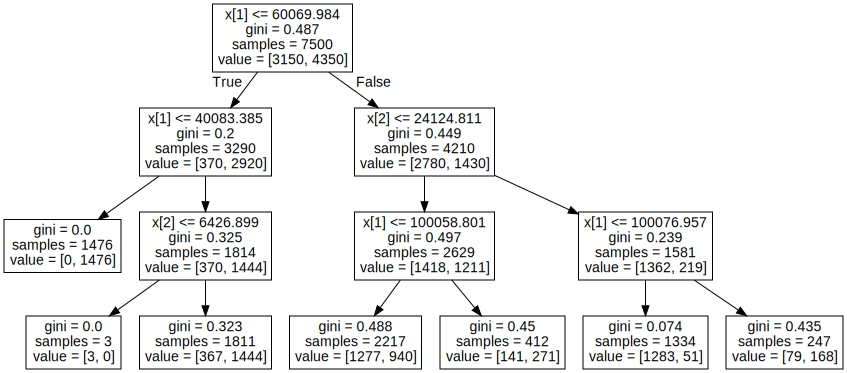

In [151]:
dot_data = export_graphviz(modelo4, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

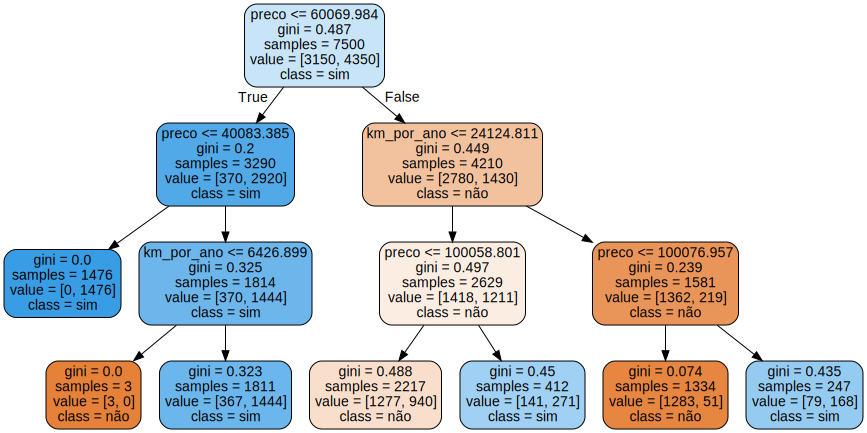

In [152]:
dot_data2 = export_graphviz(modelo4, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico2 = graphviz.Source(dot_data2)
grafico2